![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de una bicicleta durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://github.com/justmarkham/DAT8/blob/master/data/bikeshare.csv), [dicccionario de datos](https://www.kaggle.com/c/bike-sharing-demand/data).

### Datos prestamo de bicicletas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import train_test_split

In [3]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)
# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)
# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour
# Visualización
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables hour y workingday, escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [4]:
# Celda 1.1
bikes.groupby('workingday').total.mean()

workingday
0    188.506621
1    193.011873
Name: total, dtype: float64

In [5]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

In [6]:
bikes["workingday"].describe()

count    10886.000000
mean         0.680875
std          0.466159
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: workingday, dtype: float64

In [7]:
#Análisis para Workingday
cuenta=bikes.groupby('workingday').total.count()
mean=bikes.groupby('workingday').total.mean()
median=bikes.groupby('workingday').total.median()
min_=bikes.groupby('workingday').total.min()
max_=bikes.groupby('workingday').total.max()
quantil_1=bikes.groupby('workingday').total.quantile(.25)
quantil_3=bikes.groupby('workingday').total.quantile(.75)

Workingday= pd.concat((cuenta, mean, median, min_, max_,quantil_1, quantil_3), axis=1)
Workingday.columns = ['Cuenta','Promedio','Mediana','Mínimo','Máximo','Cuartil_25%', 'Cuartil_75%']
Workingday

,Cuenta,Promedio,Mediana,Mínimo,Máximo,Cuartil_25%,Cuartil_75%
workingday,,,,,,,
0,3474,188.506621,128,1,783,44.0,304.0
1,7412,193.011873,151,1,977,41.0,277.0


In [8]:
bikes["hour"].describe()

count    10886.000000
mean        11.541613
std          6.915838
min          0.000000
25%          6.000000
50%         12.000000
75%         18.000000
max         23.000000
Name: hour, dtype: float64

In [9]:
#Análisis para Hour
cuenta=bikes.groupby('hour').total.count()
mean=bikes.groupby('hour').total.mean()
median=bikes.groupby('hour').total.median()
min_=bikes.groupby('hour').total.min()
max_=bikes.groupby('hour').total.max()
quantil_1=bikes.groupby('hour').total.quantile(.25)
quantil_3=bikes.groupby('hour').total.quantile(.75)

Horas= pd.concat((cuenta, mean, median, min_, max_,quantil_1, quantil_3), axis=1)
Horas.columns = ['Cuenta','Promedio','Mediana','Mínimo','Máximo','Cuartil_25%', 'Cuartil_75%']
Horas

,Cuenta,Promedio,Mediana,Mínimo,Máximo,Cuartil_25%,Cuartil_75%
hour,,,,,,,
0,455,55.138462,41.0,2,283,24.00,74.50
1,454,33.859031,19.0,1,168,11.00,46.00
2,448,22.899554,11.0,1,119,5.00,32.00
3,433,11.757506,6.0,1,66,3.00,15.00
4,442,6.407240,6.0,1,28,3.00,9.00
5,452,19.767699,19.0,1,57,8.00,29.00
6,455,76.259341,75.0,1,213,24.50,118.00
7,455,213.116484,208.0,1,596,63.00,334.00
8,455,362.769231,392.0,8,839,133.50,563.50


### Análisis descriptivo de la variable Workingday
La variable "Workingday" tiene un total de 10.886 observaciones, al ser una variable dicotómica solo tiene valores de 0 y 1 y define si el día es fin de semana,feriado o un día laboral. Cuenta con 7412 codificadas como 1 (día laboral) y 3474 codificadas como 0. 
Al analizar la variable con nuestra variable de respuesta vemos que el número promedio de bicicletas rentadas en días laborales es de 193 aprox y de 188 en días feriados o fines de semana. Pero, en la mayoría de las veces se rentaron 151 bicicletas en días laborales y 128 en días feriados. El rango de los datos de renta en días laborales es alta teniendo un mínimo de 1 y un máximo de 977. Mientras que para los días no laborales es de 1 hasta 783. Los rangos intercuantiles nos muestran una ligera cola a la derechas de los días de trabajo ya que este rango esta entre 41 rentas diarias a 277.

### Análisis descriptivo de la variable Hour
La variable "Hour" tiene un total de 10.886 observaciones, describe la hora del día en la que se realizó la renta de la bicicleta. Cuenta con 455 filas codificadas en las horas 0 y de las 6h a las 11 horas, y 456 filas codificadas entre las 12 h y las 23 horas. 
Al analizar la variable con nuestra variable de respuesta vemos que el mayor número promedio de bicicletas rentadas se da a las 17 horas, mientras que el menor número promedio se da a las 4 horas, en general parece existir una tendencia a rentar bicicletas mayoritariamente en momentos clave para ir y regresar del trabajo, por ejemplo la media nos dice que a las 8 horas y a las 17 horas, se rentan 392 y 480 bicicletas de media. 

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica de las rentas promedio por hora cuando la variable "workingday" es igual a 0 e igual a 1, respectivamente. Analice y escriba sus hallazgos.

<AxesSubplot:xlabel='hour'>

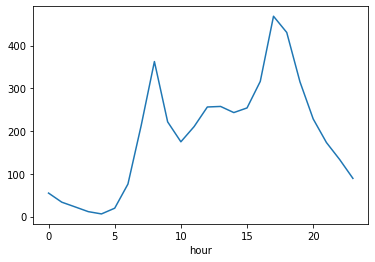

In [10]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

<AxesSubplot:xlabel='hour'>

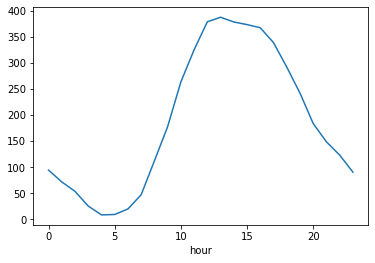

In [32]:
# Celda 2.2 - "workingday"=0 escriba su código y hallazgos 
W_0=bikes.loc[bikes['workingday']== 0] 
W_0.groupby('hour').total.mean().plot()

<AxesSubplot:xlabel='hour'>

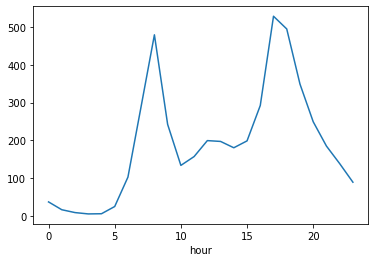

In [31]:
# Celda 2.3 - "workingday"=1 escriba su código y hallazgos 
W_1=bikes.loc[bikes['workingday']== 1] 
W_1.groupby('hour').total.mean().plot()

### Interpretación 
El promedio de renta de bicicletas en los días de trabajo calza con las horas en las que las personas van de la casa al trabajo y viceversa, siendo las 8h y las 17h donde se presenta mayor uso de las bicicletas. Mientras que para los días feriados o fines de semana el promedio de renta de las bicicletas aumenta conforme el paso del día, siendo las horas entre las 11h y las 15h donde en promedio se rentan más bicicletas.

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "hour" y "workingday" como las únicas variables predictoras. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [33]:
# Celda 3
#Factorizar las variables
bikes['hour'] = pd.factorize(bikes.hour)[0]
bikes['workingday'] = pd.factorize(bikes.workingday)[0]

# Definir las variables predictoras y la variable de respuesta
XTotal = bikes[['hour','workingday']]
yTotal = bikes['total']

#Separar la muestra para el modelado
XTrain, XTest, yTrain, yTest = train_test_split(XTotal, yTotal, test_size=0.33, random_state=0)

#Ajustar del modelo
modelo = LinearRegression()
modelo.fit(X = XTrain, y = yTrain)

#Información del modelo
print("Intercepto:", modelo.intercept_)
print("Coeficientes:", list(zip(XTrain.columns, modelo.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", modelo.score(XTrain, yTrain))

Intercepto: 63.52695347088215
Coeficientes: [('hour', 10.55099421681497), ('workingday', 6.770440995156491)]
Coeficiente de determinación R^2: 0.16353164321815283


In [34]:
#Encontrar el MSE
Pred_Rl=modelo.predict(XTest)
MSE=np.average(np.square(Pred_Rl-yTest))
print('MSE regresión de la regresión lineal es:')
print(MSE)

MSE regresión de la regresión lineal es:
27657.435595059633


### Interpretación del modelo de regresión lineal
Para este caso se realiza un ajuste del modelo de regresión lineal utilizando la variable total como variable de respuesta, explicada por "hour" y "workingday". El modelo indica que ante una variación de 10 horas la variable total aumentará en 1 y ante una variación de 6.77 en la variable workingday el total de bicicletas rentadas también aumenta.
El R2 nos indica que el modelo es capaz de explicar tan solo el 16.35% de la variabilidad observada en la variable respuesta "total"

Definitivamente el modelo posee limitaciones importantes, primero debido a la naturaleza de las variables predictoras, ya que estas son variables discretas, por ejemplo no es posible aumentar en 6 la variable "Workingday" ya que esta es tan solo una variable categórica que toma los valores 0 y 1. Por otro lado, el R2 nos indica la poca fuerza que tiene la variable para describir la variabilidad en la variable total.

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "workingday". El árbol debe tener al menos 6 nodos finales.

In [35]:
# Celda 4
# Definición de parámetros y criterios de parada
max_depth = None
num_pct = 2
max_features = None
min_gain=0.001

In [36]:
# Definiendo las variables predictoras y la variable de respuesta
XTotal = bikes[['hour','workingday']]
yTotal = (bikes.total > 191.57).astype(int)

#Separando la muestra para el modelado
XTrain, XTest, yTrain, yTest = train_test_split(XTotal, yTotal, test_size=0.33, random_state=0)

In [37]:
# Impresión variable a usar (Workingday)
j = 1
print(XTrain.columns[j])

workingday


In [38]:
# División de la variable Workingday en num_ctp puntos (parámetro definido anteriormente) para obtener posibles puntos de corte
splits = np.percentile(XTrain.iloc[:, j], np.arange(0, 100, 100.0 / num_pct).tolist())
splits = np.unique(splits)
splits

array([0., 1.])

In [39]:
# División de las observaciones usando el punto de corte en la posición 1 de la lista de splits
k=1
filter_l = XTrain.iloc[:, j] < splits[k]

# División de la variable de respuesta de acuerdo a si la observación cumple o no con la regla binaria
# y_l: la observación tiene un valor menor al punto de corte seleccionado
# y_r: la observación tiene un valor mayor o igual al punto de corte seleccionado
y_l = yTrain.loc[filter_l]
y_r = yTrain.loc[~filter_l]


In [40]:
# Definición de la función que calcula el gini index
def gini(yTrain):
    if yTrain.shape[0] == 0:
        return 0
    else:
        return 1 - (yTrain.mean()**2 + (1 - yTrain.mean())**2)

In [41]:
# Gini index de las observaciones que tienen un valor menor al punto de corte seleccionado
gini_l = gini(y_l)
gini_l

# Gini index de las observaciones que tienen un valor mayor o igual al punto de corte seleccionado
gini_r = gini(y_r)
gini_r

0.47975806671548693

In [42]:
# Definición de la función gini_imputiry para calular la ganancia de una variable predictora j dado el punto de corte k
def gini_impurity(X_col, y, split):
    
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]
    
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]
    
    gini_y = gini(y)
    gini_l = gini(y_l)
    gini_r = gini(y_r)
    
    gini_impurity_ = gini_y - (n_l / (n_l + n_r) * gini_l + n_r / (n_l + n_r) * gini_r)
    
    return gini_impurity_

In [43]:
# Ganancia de la variable 'Workingday' en el punto de corte selecionado
gini_impurity(XTrain.iloc[:, j], yTrain, splits[k])

8.162286842938737e-05

In [44]:
# Definición de la función best_split para calcular cuál es la mejor variable y punto de cortepara hacer la bifurcación del árbol
def best_split(XTrain, yTrain, num_pct=10):
    
    features = range(XTrain.shape[1])
    
    best_split = [0, 0, 0]  # j, split, gain
    
    # Para todas las varibles 
    for j in features:
        
        splits = np.percentile(XTrain.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        
        # Para cada partición
        for split in splits:
            gain = gini_impurity(XTrain.iloc[:, j], yTrain, split)
                        
            if gain > best_split[2]:
                best_split = [j, split, gain]
    
    return best_split

In [45]:
# Obtención de la variable 'j', su punto de corte 'split' y su ganancia 'gain'
j, split, gain = best_split(XTrain, yTrain, 5)
j, split, gain

(0, 7.0, 0.12725943234780446)

In [46]:
# División de las observaciones usando la mejor variable 'j' y su punto de corte 'split'
filter_l = XTrain.iloc[:, j] < split

y_l = yTrain.loc[filter_l]
y_r = yTrain.loc[~filter_l]

In [47]:
# Definición de la función tree_grow para hacer un crecimiento recursivo del árbol
def tree_grow(X, y, level=0, min_gain=0.001, max_depth=None, num_pct=10):
    
    # Si solo es una observación
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], y_prob=0.5, level=level, split=-1, n_samples=1, gain=0)
        return tree
    
    # Calcular la mejor división
    j, split, gain = best_split(X, y, num_pct)
    
    # Guardar el árbol y estimar la predicción
    y_pred = int(y.mean() >= 0.5) 
    y_prob = (y.sum() + 1.0) / (y.shape[0] + 2.0)  # Corrección Laplace 
    
    tree = dict(y_pred=y_pred, y_prob=y_prob, level=level, split=-1, n_samples=X.shape[0], gain=gain)
    # Revisar el criterio de parada 
    if gain < min_gain:
        return tree
    if max_depth is not None:
        if level >= max_depth:
            return tree   
    
    # Continuar creando la partición
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    # Siguiente iteración para cada partición
    
    tree['sl'] = tree_grow(X_l, y_l, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    
    return tree

In [48]:
cfltree = tree_grow(XTrain, yTrain, level=0, min_gain=0.001, max_depth=4, num_pct=2)
cfltree

{'y_pred': 0,
 'y_prob': 0.3950651130911583,
 'level': 0,
 'split': [0, 7.0],
 'n_samples': 7293,
 'gain': 0.12725943234780446,
 'sl': {'y_pred': 0,
  'y_prob': 0.004199720018665422,
  'level': 1,
  'split': -1,
  'n_samples': 2141,
  'gain': 4.523805688008697e-06},
 'sr': {'y_pred': 1,
  'y_prob': 0.5576251455180442,
  'level': 1,
  'split': [0, 18.0],
  'n_samples': 5152,
  'gain': 0.008425549760217033,
  'sl': {'y_pred': 1,
   'y_prob': 0.6057779115257298,
   'level': 2,
   'split': [0, 14.0],
   'n_samples': 3321,
   'gain': 0.009810793290686903,
   'sl': {'y_pred': 1,
    'y_prob': 0.5516578567996155,
    'level': 3,
    'split': [0, 9.0],
    'n_samples': 2079,
    'gain': 0.002094138325064887,
    'sl': {'y_pred': 1,
     'y_prob': 0.6030664395229983,
     'level': 4,
     'split': -1,
     'n_samples': 585,
     'gain': 0.27619335784761756},
    'sr': {'y_pred': 1,
     'y_prob': 0.5314171122994652,
     'level': 4,
     'split': -1,
     'n_samples': 1494,
     'gain': 0.03720

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "hour" y "workingday" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

In [49]:
# Celda 5
#Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 15)

# Lista para guardar los valores del RMSE para cada valor de máxima profundidad (max_depth)
accuracy_scores = []

# Importación de modelos de sklearn 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, XTrain, yTrain, cv=10, scoring='accuracy').mean())

Text(0, 0.5, 'Accuracy')

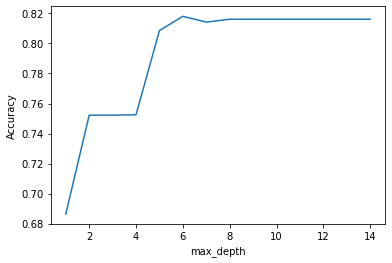

In [50]:
import matplotlib.pyplot as plt
# Gráfica max_depth versus RMSE (error del modelo)

plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

In [51]:
# Mejor accuracy (desempeño del modelo) y su correspondiente max_depth
sorted(zip(accuracy_scores, max_depth_range))[::-1][0]

(0.8180446098051375, 6)

In [52]:
# max_depth=9 fue el mejor, se ajusta un árbol usando este valor 
clfTree = DecisionTreeClassifier(max_depth=6, random_state=1)
clfTree.fit(XTrain, yTrain)

DecisionTreeClassifier(max_depth=6, random_state=1)

In [53]:
prediccionTree=clfTree.predict_proba(XTest)[:,0]

In [54]:
MSE=np.average(np.square(prediccionTree-yTest))
print('MSE regresión del árbol es:')
print(MSE)

MSE regresión del árbol es:
0.627048340310263


### Interpretación del modelo de árbol de decisión
El modelo de árbol de decisión es en definitiva más adecuado que realizar una regresión lineal para predecir a la variable que indica el número total de rentas de bicicleta en un día y hora designado.

El uso de árboles no se ve afectado por valores atípicos, lo que puede ayudar en caso de que los datos presenten un outlier. Si comparamos los errores cuadráticos medios, el árbol de regresión da una métrica de 0.62, muy por debajo de 27657.4 que da como resultado el MSE de la regressión. El árbol de decisión tiene una mayor poder de predicción para la variable total y no presenta el problema de interpretabilidad de los coeficientes de las variables predictivas, sino que facilita su interpretación.

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la populridad esta dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el sigueinte enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [55]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [56]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [57]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [91]:
# Celda 6
#Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 15)

# Lista para guardar los valores del RMSE para cada valor de máxima profundidad (max_depth)
accuracy_scores = []

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, X, y, cv=10, scoring='accuracy').mean())
    
    # Mejor accuracy (desempeño del modelo) y su correspondiente max_depth
sorted(zip(accuracy_scores, max_depth_range))[::-1][0]


(0.6353333333333333, 2)

In [92]:
# max_depth=2 fue el mejor, se ajusta un árbol usando este valor 
clfTree = DecisionTreeClassifier(max_depth=2, random_state=1)
clfTree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=1)

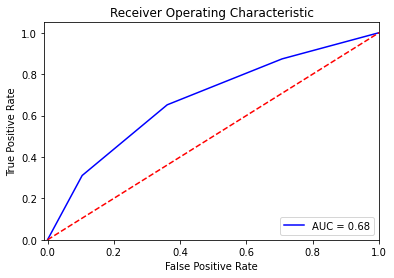

In [93]:
from sklearn import metrics

prediccionTree=clfTree.predict_proba(X_test)[:,0]
fpr, tpr, thresholds = metrics.roc_curve(y_test, prediccionTree, pos_label=0)
AUCTree=metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUCTree)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [94]:
### Estimación del error del modelo con datos Test

prediccionTree[prediccionTree < 0.5] = 0
prediccionTree[prediccionTree >= 0.5] = 1

In [95]:
#Métrica de F1 de la predicción de árbol de decisión
metrics.f1_score(prediccionTree, y_test)

0.3606340819022458

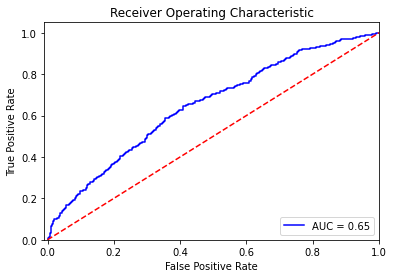

In [96]:
#Modelo de Regresión Logística
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression()
modelo.fit(X = X_train, y = y_train)
prediccionLR = modelo.predict_proba(X_test)[:,0]

fpr, tpr, thresholds = metrics.roc_curve(y_test, prediccionLR, pos_label=0)
AUCRL=metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUCRL)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [100]:
### Estimación del error del modelo con datos Test

prediccionLR[prediccionLR < 0.5] = 0
prediccionLR[prediccionLR >= 0.5] = 1

In [101]:
#Métrica de F1 de la predicción de regresión logística
metrics.f1_score(prediccionLR, y_test)

0.39606557377049173

### Interpretación

El Accuracy del modelo del árbol de decisión para pronosticar la variable es de 0.68 levemente mayor que el AUC de 0.65 que se obtiene de la regresión logística, por lo que tiene un mejor proder de predicción y además es más sencillo de interpretar.

Sin embargo, cuando analizamos el F1-score la regresión logística tiene mayor poder de precisión, con un 0.3960 frente a un 0.36.

### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth = None\
-100 árboles de decisión donde max_depth = 2\
-100 regresiones logísticas

Evalúe los modelos utilizando las métricas de Accuracy y F1-Score.

In [102]:
# Celda 7
# Definición del modelo BaggingClassifier de la libreria sklearn
from sklearn.ensemble import BaggingClassifier
clf1 = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=None, random_state=1), n_estimators=100, 
                        bootstrap=True,random_state=42, n_jobs=-1, oob_score=True)

# Predicción y desempeño al hacer votación mayoritaria
clf1.fit(X_train, y_train)
y_pred = clf1.predict(X_test)
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)


(0.642384105960265, 0.64)

In [103]:
clf2 = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1), n_estimators=100, 
                        bootstrap=True,random_state=42, n_jobs=-1, oob_score=True)

# Predicción y desempeño al hacer votación mayoritaria
clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.6439545758183033, 0.6446666666666667)

### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [ ]:
# Celda 8


### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

In [ ]:
# Celda 9